# SVM Classifer Challenge

For this challenge, we will be using the [epicurious](https://www.kaggle.com/hugodarwood/epirecipes) dataset, which has a collection of recipes, key terms and ingredients, and ratings. 

We will be trying to predict the ratings of recipes by using ingredient and keywords list. This information would be helpful for authors who are deciding which recipes to include a cookbook. Selecting highly rated recipes could increase the enjoy of readers and increasing the chance of success. 

In [1]:
# Libraries 

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVR


from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Import data 
data = pd.read_csv('/Users/tsawaengsri/Desktop/Data Science Courses/Datasets/epi_r.csv')
data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('__', '_').str.replace('(', '').str.replace(')', '')

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute_meals', '3-ingredient_recipes',
       ...
       'yellow_squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack_week', 'turkey'],
      dtype='object', length=680)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


This dataset contains 680 attributes containing keywords from recipes and 20,052 rows. We will definitely have to sort through these attributes and select the most important features in predicting ratings. 

First, let's get an idea of the distribution of our target varaible .

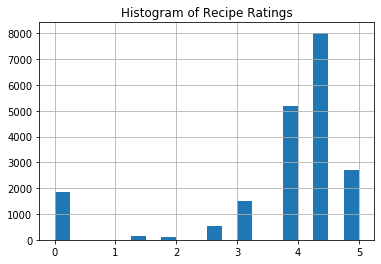

In [4]:
# Plot rating
data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

We can see that majority of the ratings are 4 or higher. With this information, we can convert this to a binary classification task by splitting the ratings 4.5 and above and grouping it as good ratings. 

Let's continue by seeing if there are any missing values. 

In [5]:
# Missing values
miss_val = data.isnull().sum()
miss_val[miss_val>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

It appears that the dataset is missing nutritional information for the ingredients in the recipes. We'll probably drop these columns. 

## Preparing data

We'll start by splitting the outcome variable into two classes, good rating represented by 1 and anything less as 0. 

In [6]:
data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

From the rating statistics, 50% of data falls around a rating of 4.3 so we'll consider anything 4 and above as a good rating. 

In [7]:
# New outcome variable 
data['good_rating'] = np.where(data['rating'] >= 4, 1, 0)

data[['rating','good_rating']].head()

,rating,good_rating
0,2.500,0
1,4.375,1
2,3.750,0
3,5.000,1
4,3.125,0


### Feature Selection 

Let's start feature selection by identifying which variables are correlated to recipes with good ratings. 

In [8]:
# Correlation between good ratings and variables 
features = data.drop(columns=['rating', 'calories', 
                           'protein', 'fat', 'sodium','title'], axis=1)
corrmat = features.corr()
rating_corr = np.abs(corrmat['good_rating'].sort_values(ascending = False))


In [9]:
# Top 30 features correlated to good ratings
top_30 = rating_corr.head(n=31)
top_30 = top_30[1:31]
top_30

bon appétit          0.097076
roast                0.068198
thanksgiving         0.067094
peanut free          0.065897
soy free             0.065799
dinner               0.062186
christmas            0.054409
grill/barbecue       0.051204
tree nut free        0.047943
backyard bbq         0.047682
fall                 0.046565
grill                0.042924
stuffing/dressing    0.042454
goat cheese          0.041207
father's day         0.036564
dessert              0.036225
meat                 0.035801
fourth of july       0.033651
low carb             0.033458
turkey               0.033409
pork tenderloin      0.033370
cranberry            0.033333
sausage              0.031639
cake                 0.031405
brisket              0.031385
bake                 0.031329
red wine             0.031070
lamb                 0.030731
high fiber           0.030375
pescatarian          0.029739
Name: good_rating, dtype: float64

In [10]:
# Return column name of most correlated features
keywords = list(top_30.index)

## Modeling
### Iteration 1 
We'll start modeling by using all variables as features expect ones with null values.

In [11]:
# Set up the predictors and the target variable
X = data.drop(columns=['good_rating', 'rating', 'calories', 
                           'protein', 'fat', 'sodium','title'], axis=1)
Y = data['good_rating']

In [12]:
#Run SVC with most variables
#svc = SVC()

#svc.fit(X,Y)
#print(svc.score(X,Y))
#print(cross_val_score(svc, X, Y))

I think the kernel stopped running so we'll move on to the next iteration.

### Iteration 2 
This time, we will use the top 30 variables identified during feature selection as our explanatory variables. 

In [13]:
#Run SVC using new list of 30 elements
svc = SVC()
X2 = X[keywords]

svc.fit(X2,Y)
print(svc.score(X2,Y))
print(cross_val_score(svc, X2, Y))

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5703171753441053


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/sv

[0.56738968 0.56897068 0.55977854]


This model also preformed poorly. There is an average of 57% accuracy. 

### Iteration 3 
Let's try using PCA to combine the top 30 variables. 

In [14]:
# PCA top 30 variables
from sklearn.decomposition import PCA
df_pca = PCA(n_components=2)
principalComponents_df = df_pca.fit_transform(X2)

In [15]:
# Create a DataFrame that will have the principal component values
principal_rating_Df = pd.DataFrame(data = principalComponents_df
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
principal_rating_Df.tail()

,principal component 1,principal component 2
20047,-0.815274,-0.404594
20048,1.322667,-0.094175
20049,0.912698,-0.374310
20050,-0.762790,0.317422
20051,-0.674748,0.768695


In [17]:
print('Explained variation per principal component: {}'.format(df_pca.explained_variance_ratio_))

Explained variation per principal component: [0.34773345 0.11098046]


In [18]:
#Run SVC using PCa
#svc = SVC()
#X3 = df_pca

#svc.fit(X3,Y)
#print(svc.score(X3,Y))
#print(cross_val_score(svc, X3, Y))

# NOTE: Type error float() argument must be a string or a number, not 'PCA'

TypeError: float() argument must be a string or a number, not 'PCA'

### Iteration 4 
What if we reset the binary split of a good rating from a score of 4 to 3. 

In [19]:
# New outcome variable 
df = data.copy()
df['good_rating'] = np.where(df['rating'] >= 3, 1, 0)

In [20]:
# Set up the predictors and the target variable
X = df.drop(columns=['good_rating', 'rating', 'calories', 
                           'protein', 'fat', 'sodium','title'], axis=1)
Y = data['good_rating']

In [21]:
# Correlation between good ratings and variables 
features = df.drop(columns=['rating', 'calories', 
                           'protein', 'fat', 'sodium','title'], axis=1)
corrmat = features.corr()
rating_corr = np.abs(corrmat['good_rating'].sort_values(ascending = False))

In [22]:
# Top 30 features correlated to good ratings
top_30 = rating_corr.head(n=31)
top_30 = top_30[1:31]
top_30

bon appétit        0.117994
sauté              0.092744
bake               0.081859
peanut free        0.080314
soy free           0.077462
fall               0.072588
quick & easy       0.070940
tree nut free      0.069962
gourmet            0.067053
winter             0.063686
roast              0.063384
onion              0.059539
tomato             0.056917
no sugar added     0.052620
pasta              0.051625
vegetable          0.051278
high fiber         0.051170
kosher             0.050642
herb               0.049187
cheese             0.045409
dinner             0.044913
pescatarian        0.044343
pork               0.044059
mustard            0.043584
chicken            0.042959
beef               0.042135
sugar conscious    0.041049
low carb           0.040918
thanksgiving       0.040861
side               0.039360
Name: good_rating, dtype: float64

In [23]:
# Return column name of most correlated features
keywords2 = list(top_30.index)

In [24]:
#Run SVC using new list of 30 elements
svc = SVC()
X4 = X[keywords2]
Y2 = df['good_rating']
svc.fit(X4,Y)
print(svc.score(X4,Y2))
print(cross_val_score(svc, X4, Y2))

/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7150408936764413


/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/tsawaengsri/anaconda3/lib/python3.6/site-packages/sklearn/sv

[0.86746447 0.86759425 0.86757444]


## Summary 

Due to the size of the dataset, selecting all variables as features was not an effective approach to feature selection. The model had a hard time processing through the data and ultimately was very time consuming. By limiting features to top 30 most correlated variables to ratings, our model yields a 57% accuracy rate. I was unsuccessful in using PCA in the next iteration. Reclassifying the binary split of a good rating to a score of 3 seemed to be the best way to increase our accuracy rate to around 71%. 

### Bias in the dataset
In general, reviews are biased toward the extremes. Those who have a strong opinion towards a subject, whether it is positive or negative, will more likely write a review than those who are not are in the middle about something. We can observe in the dataset since there aren't many ratings around 3 or 3.5. 

This dataset may also be biased towards certain demographics. When creating a list of most correlated variables to good ratings, keywords relating to American diets, such as bbq, pork, and cheese occurred most often. In addition, the data also reflects popularity of using recipes during American holidays with keywords like Christmas, July fourth and Thanksgiving.
